## Partition methods (K-Means)

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

In [19]:
#check data type
print(df.dtypes)

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [27]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_summary = df.groupby('Cluster_KMeans')[numeric_columns].mean()
print(cluster_summary)


                customer_age  vendor_count  product_count  is_chain  \
Cluster_KMeans                                                        
0                  27.526426      2.547963       4.266112  2.071377   
1                  27.457234      1.904584       2.902155  1.485885   
2                  27.538880      8.619949      18.960859  9.551768   

                first_order  last_order  CUI_American  CUI_Asian  \
Cluster_KMeans                                                     
0                 27.934115   64.208978      4.274121   8.613257   
1                 37.562875   55.360720      2.824065   5.920362   
2                  8.424242   81.995960     12.775419  26.182250   

                CUI_Beverages  CUI_Cafe  ...     HR_18     HR_19     HR_20  \
Cluster_KMeans                           ...                                 
0                    1.927139  0.429539  ...  0.242062  0.165531  0.092214   
1                    1.533536  0.290355  ...  0.173530  0.123343  0.0

In [20]:
#tranform categorical into numerical
df['region_num'] = df['customer_region'].astype('category').cat.codes
df['payment_method_num'] = df['payment_method'].astype('category').cat.codes
df['last_promo_binary'] = (df['last_promo'].notnull()).astype(int)


In [30]:
df = df.fillna(0)  # Replace NaN with 0 or another default value


In [21]:
# Select numeric columns for clustering
numerical_features = [
    'customer_age', 
    'vendor_count', 
    'product_count', 
    'region_num', 
    'payment_method_num', 
    'last_promo_binary', 
    'first_order', 
    'last_order'
]
df_numerical = df[numerical_features]


In [22]:
# Replace missing values with the mean
df_numerical = df_numerical.fillna(df_numerical.mean())


In [23]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerical)


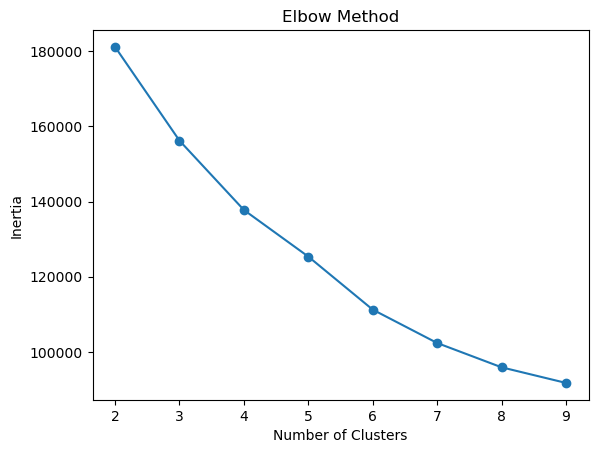

In [24]:
# Determine the optimal number of clusters
distortions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(2, 10), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Look for the "elbow" in the graph to identify the optimal number of clusters.

### Aplly K-Means

In [25]:
# Fit K-Means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Add the clusters to the original DataFrame
df['Cluster_KMeans'] = clusters_kmeans


In [1]:
.....

SyntaxError: invalid syntax (2146513351.py, line 1)